<a href="https://colab.research.google.com/github/cgroba/Data-for-Colab/blob/master/FZI_new_deep6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Ajuste Red Neuronal de información de Guadalupe para Determinar FZI desde cores

In [0]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [345]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0


In [346]:
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-tdxs4gh2
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-tdxs4gh2
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0cc14a8a40d1bddf8f3b04c908c94d69e9d8addce_-cp36-none-any.whl size=114000 sha256=447f61dc068f8ddc2e2c0389a7f7f113bedd7ba8e9053a335bdef03c453d081f
  Stored in directory: /tmp/pip-ephem-wheel-cache-uxhyvs97/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
# Cargar el archivo de datos

In [0]:
url='https://raw.githubusercontent.com/cgroba/Data-for-Colab/master/DatosLlanos7-6-2020.csv'
dataset = pd.read_csv(url)

In [349]:
dataset.tail()

,POZO,DEPTH,Unidad,X,Y,CALI,Core_GrnDn,Core_Kmax,Core_Por,Core_k_vert,GR,GR_Core,KLogs2,KTim,PEF,PHID,PHIE,PHIE1,PHIN,ResD,ResM,ResS,RHOB,Ro,RT,SwA,Vshl,Vshl1,FZI
865,Bacano-4,10059.0,Gacheta,1149216.45,972423.71,8.5910,2.66,1521.0,0.242,NaN,47.1314,108.710,2381.2551,2612.3254,2.0812,0.2235,0.2260,0.2013,0.2720,32.2371,29.5623,24.6983,2.2735,58.3682,32.2371,1.0,0.0920,0.1913,10.622854
866,Bacano-4,10059.6,Gacheta,1149216.45,972423.71,8.6140,2.65,2607.0,0.255,NaN,43.3722,76.258,2554.7783,3153.8118,2.0188,0.2267,0.2289,0.2162,0.2510,27.5031,25.7183,23.7975,2.2683,66.1606,27.5031,1.0,0.0428,0.0961,10.663018
867,Bacano-4,10060.3,Gacheta,1149216.45,972423.71,8.5109,2.65,4308.0,0.282,NaN,72.0350,75.304,2643.4092,3318.9275,2.1935,0.2283,0.2303,0.2190,0.2499,27.7229,25.7515,22.3890,2.2656,66.5057,27.7229,1.0,0.0376,0.0852,10.703071
868,Bacano-4,10060.8,Gacheta,1149216.45,972423.71,8.5453,2.64,35.0,0.188,NaN,106.4149,74.374,715.8411,564.1653,2.3737,0.1740,0.1818,0.1531,0.2446,33.9781,31.5260,29.2676,2.3547,69.3022,33.9781,1.0,0.1435,0.2785,10.743013
869,Bacano-4,10061.0,Gacheta,1149216.45,972423.71,8.5698,2.67,311.0,0.209,NaN,120.9585,71.810,328.4327,193.4532,2.4338,0.1460,0.1578,0.1249,0.2404,37.4071,34.7236,33.8946,2.4005,67.8935,37.4071,1.0,0.2064,0.3720,10.743013


In [350]:
dataset.shape

(870, 29)

In [0]:
# Limpieza de datos

In [352]:
dataset.pop("POZO")
dataset.pop("Core_GrnDn")
#dataset.pop("Unidad")
#dataset.pop("Core_Kmax")
#dataset.pop("Core_Por")
dataset.pop("GR_Core")
dataset = dataset[dataset.Unidad != "Gacheta"]
dataset = dataset[dataset.Unidad != "Paleosuelo Guadalupe"]
dataset.pop("Unidad")
dataset

,DEPTH,X,Y,CALI,Core_Kmax,Core_Por,Core_k_vert,GR,KLogs2,KTim,PEF,PHID,PHIE,PHIE1,PHIN,ResD,ResM,ResS,RHOB,Ro,RT,SwA,Vshl,Vshl1,FZI
16,10088.1,1148751.74,975765.68,8.7407,608.351,0.229,NaN,29.2342,2815.2502,2396.4456,1.8814,0.2435,0.2330,0.1834,0.3399,116.2825,109.0381,74.5505,2.2406,30.2410,116.2825,0.3684,0.2120,0.3798,5.448888
17,10089.4,1148751.74,975765.68,8.9866,404.224,0.197,NaN,48.3148,1697.6830,1050.0261,2.0692,0.2342,0.2126,0.1547,0.3581,151.6457,134.5871,94.0005,2.2560,25.3893,151.6457,0.2339,0.2974,0.4886,5.797716
18,10090.4,1148751.74,975765.68,8.6743,0.003,0.030,NaN,62.7574,361.4291,116.2513,1.9672,0.1864,0.1606,0.1054,0.3433,120.9023,104.3996,77.1755,2.3343,22.0054,120.9023,0.2222,0.4185,0.6183,0.321056
19,10091.3,1148751.74,975765.68,8.7456,120.219,0.184,NaN,42.1639,727.6721,315.3196,2.0076,0.2068,0.1823,0.1251,0.3501,143.8780,124.7402,72.2780,2.3009,23.4165,143.8780,0.2103,0.3659,0.5649,3.559423
20,10092.3,1148751.74,975765.68,8.8080,280.236,0.212,NaN,33.1154,1860.9396,1564.7826,1.9541,0.2186,0.2161,0.1742,0.3061,144.6975,116.6501,63.0186,2.2815,34.9178,144.6975,0.3439,0.1874,0.3451,4.243401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,9972.6,1149216.45,972423.71,8.8893,2197.000,0.252,NaN,40.1835,2565.9414,3064.9753,1.9721,0.2266,0.2291,0.2121,0.2592,453.4510,366.7554,154.5385,2.2684,8.3068,453.4510,0.1319,0.0588,0.1286,3.277834
798,9974.4,1149216.45,972423.71,8.9189,1368.000,0.224,NaN,24.6453,2428.3413,2902.6003,2.1237,0.2242,0.2268,0.2113,0.2543,195.8249,186.4911,153.0110,2.2723,8.5088,195.8249,0.2054,0.0539,0.1187,3.345193
799,9975.3,1149216.45,972423.71,8.8632,3295.000,0.253,NaN,24.9690,2805.8945,3516.0298,1.9727,0.2307,0.2328,0.2196,0.2556,472.6554,465.2918,174.6867,2.2616,8.2120,472.6554,0.1292,0.0437,0.0978,3.411288
800,9975.9,1149216.45,972423.71,8.8400,2662.000,0.238,NaN,32.8869,3051.2876,3927.7813,1.9516,0.2346,0.2364,0.2246,0.2564,494.8711,499.1057,187.5091,2.2553,8.0420,494.8711,0.1253,0.0379,0.0858,3.476190


In [353]:
dataset.isna().sum()

DEPTH            0
X                0
Y                0
CALI             0
Core_Kmax       63
Core_Por         0
Core_k_vert    506
GR               0
KLogs2           0
KTim             0
PEF              0
PHID             0
PHIE             0
PHIE1            0
PHIN             0
ResD             0
ResM           116
ResS             0
RHOB             0
Ro               1
RT               0
SwA              0
Vshl             0
Vshl1            0
FZI             89
dtype: int64

In [354]:
#Quitamos ResM por falta de datos
dataset.pop("ResM")
dataset.pop("Core_k_vert")
dataset=dataset.dropna(subset=['FZI'])
dataset=dataset.dropna(subset=['Ro'])
sort_by_FZI = dataset.sort_values('FZI')
sort_by_FZI.drop(sort_by_FZI.tail(1).index,inplace=True)
dataset=sort_by_FZI
dataset.isna().sum()

DEPTH        0
X            0
Y            0
CALI         0
Core_Kmax    0
Core_Por     0
GR           0
KLogs2       0
KTim         0
PEF          0
PHID         0
PHIE         0
PHIE1        0
PHIN         0
ResD         0
ResS         0
RHOB         0
Ro           0
RT           0
SwA          0
Vshl         0
Vshl1        0
FZI          0
dtype: int64

In [355]:
dataset.shape

(484, 23)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b8f3d5c0>]],
      dtype=object)

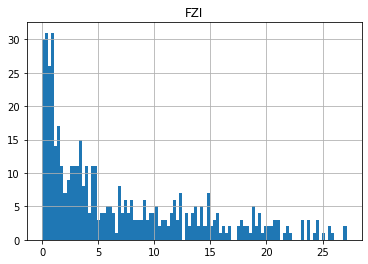

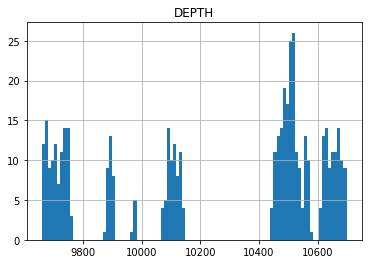

In [356]:
dataset.hist(column='FZI',bins=100)
dataset.hist(column='DEPTH',bins=100)

Text(0, 0.5, 'DEPTH')

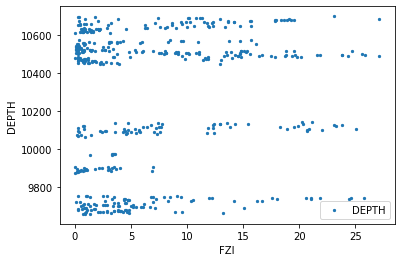

In [357]:
plt.scatter(dataset['FZI'], dataset['DEPTH'],label='DEPTH',s=5)
plt.legend(loc='best', fontsize=10)
plt.xlabel('FZI')
plt.ylabel('DEPTH')

In [358]:
print(" Corr FZI con DEPTH        = ",dataset['FZI'].corr(dataset['DEPTH']))

 Corr FZI con DEPTH        =  0.11366436539438164


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b8ef6898>]],
      dtype=object)

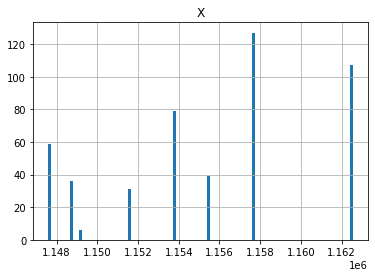

In [359]:
dataset.hist(column='X',bins=100)

Text(0, 0.5, 'X')

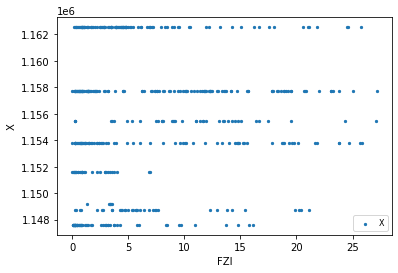

In [360]:
plt.scatter(dataset['FZI'], dataset['X'],label='X',s=5)
plt.legend(loc='best', fontsize=8)
plt.xlabel('FZI')
plt.ylabel('X')

In [361]:
print(" Corr FZI con X       = ",dataset['FZI'].corr(dataset['X']))

 Corr FZI con X       =  0.11914178857115912


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b8b0d240>]],
      dtype=object)

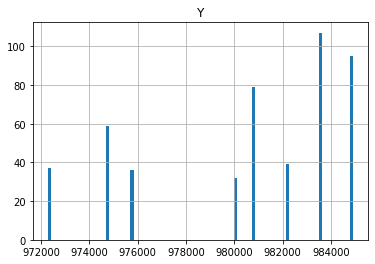

In [362]:
dataset.hist(column='Y',bins=100)

Text(0, 0.5, 'Y')

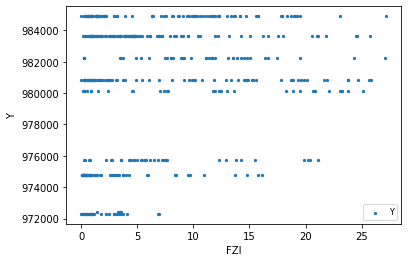

In [363]:
plt.scatter(dataset['FZI'], dataset['Y'],label='Y',s=5)
plt.legend(loc='best', fontsize=8)
plt.xlabel('FZI')
plt.ylabel('Y')

In [364]:
print(" Corr FZI con Y        = ",dataset['FZI'].corr(dataset['Y']))

 Corr FZI con Y        =  0.20684626731362993


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b89b2860>]],
      dtype=object)

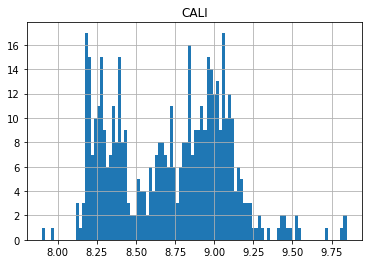

In [365]:
dataset.hist(column='CALI',bins=100)

Text(0, 0.5, 'CALI')

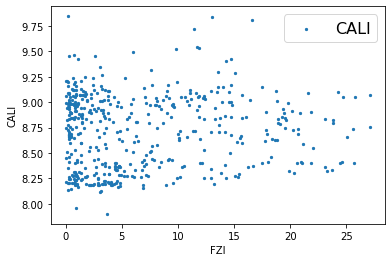

In [366]:
plt.scatter(dataset['FZI'], dataset['CALI'],label='CALI',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('CALI')

In [367]:
print(" Corr FZI con CALI        = ",dataset['FZI'].corr(dataset['CALI']))

 Corr FZI con CALI        =  0.05906796452840605


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b8755f28>]],
      dtype=object)

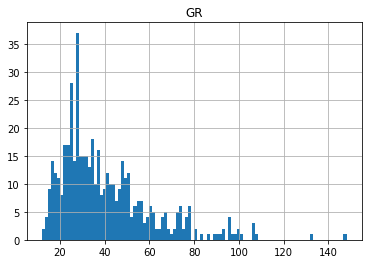

In [368]:
dataset.hist(column='GR',bins=100)

Text(0, 0.5, 'GR')

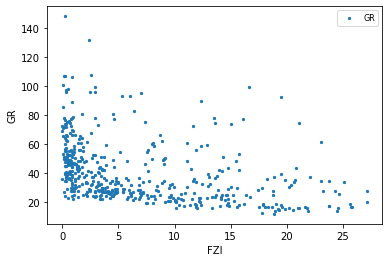

In [369]:
plt.scatter(dataset['FZI'], dataset['GR'],label='GR',s=5)
plt.legend(loc='best', fontsize=8)
plt.xlabel('FZI')
plt.ylabel('GR')

In [370]:
print(" Corr FZI con GR       = ",dataset['FZI'].corr(dataset['GR']))

 Corr FZI con GR       =  -0.3896245460027827


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b8282b38>]],
      dtype=object)

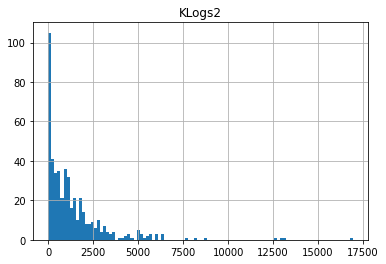

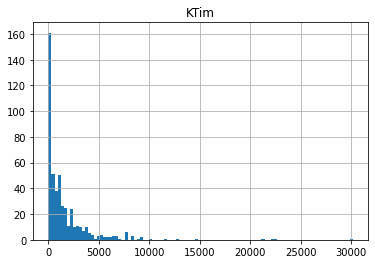

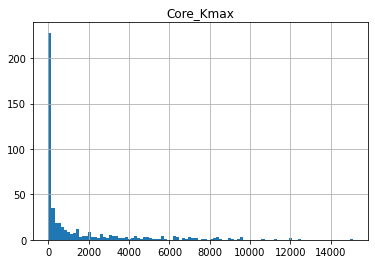

In [371]:
dataset.hist(column='KLogs2',bins=100)
dataset.hist(column='KTim',bins=100)
dataset.hist(column='Core_Kmax',bins=100)

Text(0, 0.5, 'KTim')

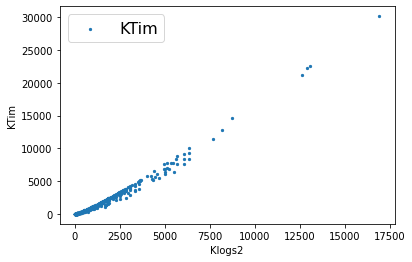

In [372]:
plt.scatter(dataset['KLogs2'], dataset['KTim'],label='KTim',s=5)
#plt.scatter(dataset['KTim'], dataset['Core_Kmax'],label='KTim')
plt.legend(loc='best', fontsize=16)
plt.xlabel('Klogs2')
plt.ylabel('KTim')

Text(0, 0.5, 'Core_Kmax , KLogs2 , Ktim')

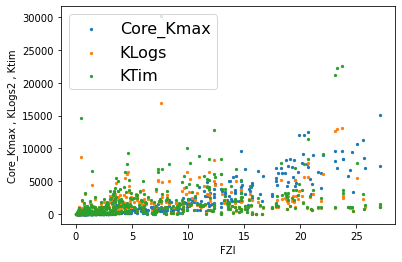

In [373]:
plt.scatter(dataset['FZI'], dataset['Core_Kmax'],label='Core_Kmax',s=5)
plt.scatter(dataset['FZI'], dataset['KLogs2'],label='KLogs',s=5)
plt.scatter(dataset['FZI'], dataset['KTim'],label='KTim',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('Core_Kmax , KLogs2 , Ktim')

In [0]:
#factor = 3
#upper_lim = dataset['KLogs2'].mean () + dataset['KLogs2'].std() * factor
#lower_lim = dataset['KLogs2'].mean () - dataset['KLogs2'].std() * factor
#dataset = dataset[(dataset['KLogs2'] < upper_lim) & (dataset['KLogs2'] > lower_lim)]
#upper_lim = dataset['Core_Kmax'].mean () + dataset['Core_Kmax'].std() * factor
#lower_lim = dataset['Core_Kmax'].mean () - dataset['Core_Kmax'].std() * factor
#dataset = dataset[(dataset['Core_Kmax'] < upper_lim) & (dataset['Core_Kmax'] > lower_lim)]

In [375]:
print(" Corr FZI con KLogs = ",dataset['FZI'].corr(dataset['KLogs2']))
print(" Corr FZI con KTim  = ",dataset['FZI'].corr(dataset['KTim']))
print(" Corr FZI con Core_Kmax  = ",dataset['FZI'].corr(dataset['Core_Kmax']))

 Corr FZI con KLogs =  0.4001326698080244
 Corr FZI con KTim  =  0.3754029291843291
 Corr FZI con Core_Kmax  =  0.8684199750098103


In [0]:
dataset.insert(13, "PROM_KLOGS2_KTim", (dataset['ResD']+dataset['ResS'])/2, True)

In [377]:
print(" Corr FZI con KLogs          = ",dataset['FZI'].corr(dataset['KLogs2']))
print(" Corr FZI con KTim           = ",dataset['FZI'].corr(dataset['KTim']))
print(" Corr FZI con Core_Kmax      = ",dataset['FZI'].corr(dataset['Core_Kmax']))
print(" Corr FZI con PromKlogsKtim  = ",dataset['FZI'].corr(dataset['PROM_KLOGS2_KTim']))

 Corr FZI con KLogs          =  0.4001326698080244
 Corr FZI con KTim           =  0.3754029291843291
 Corr FZI con Core_Kmax      =  0.8684199750098103
 Corr FZI con PromKlogsKtim  =  0.4291349666571265


In [378]:
#Elegimos PROM_KLOGS2_KTim, borramos Ktim y KLogs. Tambien Core_Kmax (no disponible para entrenar)
dataset.pop("KTim")
dataset.pop("KLogs2")
dataset.pop("Core_Kmax")

366        0.0000
710        0.0000
563        0.0000
679        0.0002
72         0.0015
          ...    
585    11299.0244
256     8549.7461
579     6946.3018
307     7383.3848
455    15095.2686
Name: Core_Kmax, Length: 484, dtype: float64

In [0]:
#factor = 3
#upper_lim = dataset['KTim'].mean () + dataset['KTim'].std() * factor
#lower_lim = dataset['KTim'].mean () - dataset['KTim'].std() * factor
#dataset = dataset[(dataset['KTim'] < upper_lim) & (dataset['KTim'] > lower_lim)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4aff49048>]],
      dtype=object)

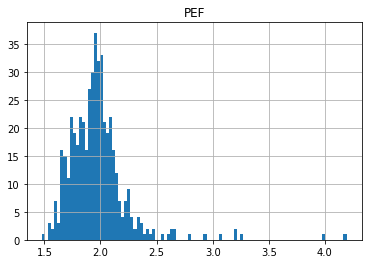

In [380]:
dataset.hist(column='PEF',bins=100)


Text(0, 0.5, 'PEF')

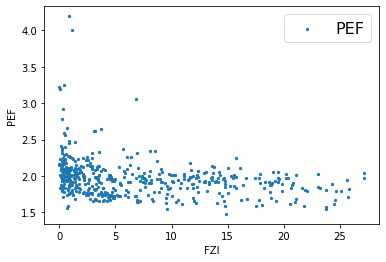

In [381]:
plt.scatter(dataset['FZI'], dataset['PEF'],label='PEF',s=5)
#plt.scatter(dataset['KTim'], dataset['Core_Kmax'],label='KTim')
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('PEF')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b83f75c0>]],
      dtype=object)

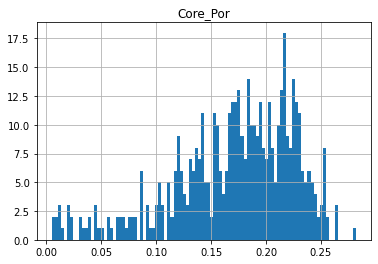

In [382]:
dataset.hist(column='Core_Por',bins=100)

Text(0, 0.5, 'Core_Por')

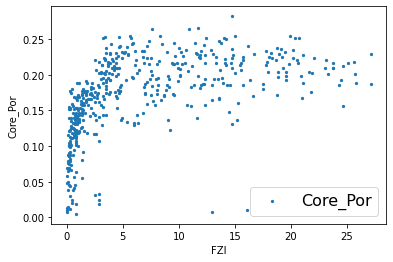

In [383]:
plt.scatter(dataset['FZI'], dataset['Core_Por'],label='Core_Por',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('Core_Por')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b9c36908>]],
      dtype=object)

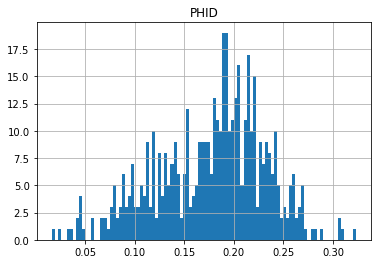

In [384]:
dataset.hist(column='PHID',bins=100)

Text(0, 0.5, 'PHID')

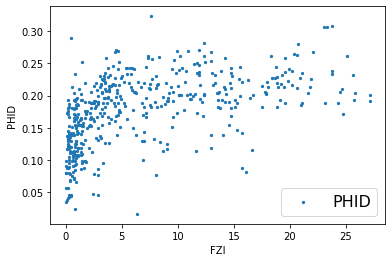

In [385]:
plt.scatter(dataset['FZI'], dataset['PHID'],label='PHID',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('PHID')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4afe26208>]],
      dtype=object)

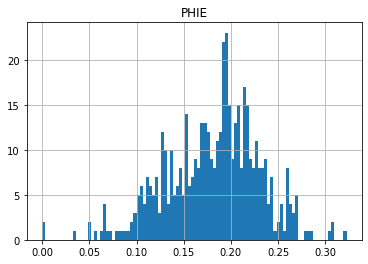

In [386]:
dataset.hist(column='PHIE',bins=100)

Text(0, 0.5, 'PHIE')

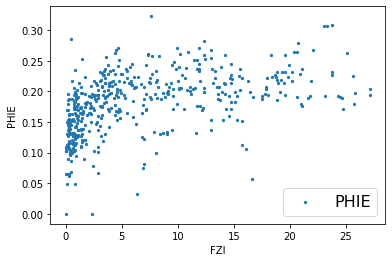

In [387]:
plt.scatter(dataset['FZI'], dataset['PHIE'],label='PHIE',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('PHIE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b9fd12e8>]],
      dtype=object)

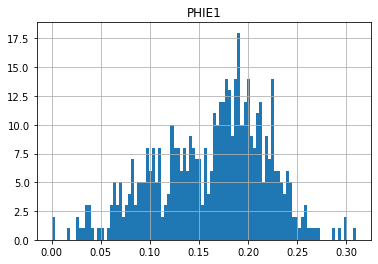

In [388]:
dataset.hist(column='PHIE1',bins=100)

Text(0, 0.5, 'PHIE1')

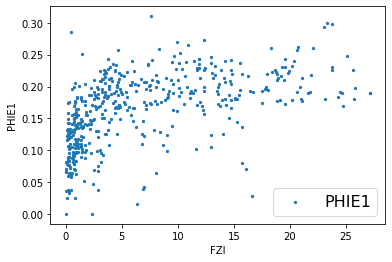

In [389]:
plt.scatter(dataset['FZI'], dataset['PHIE1'],label='PHIE1',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('PHIE1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4c0642b70>]],
      dtype=object)

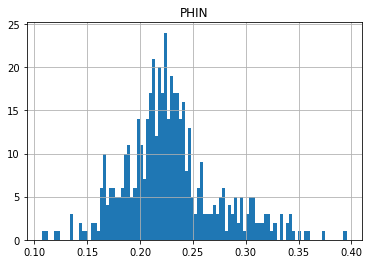

In [390]:
dataset.hist(column='PHIN',bins=100)

Text(0, 0.5, 'PHIN')

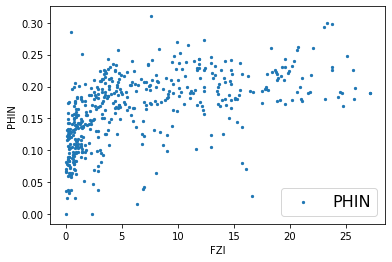

In [391]:
plt.scatter(dataset['FZI'], dataset['PHIE1'],label='PHIN',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('PHIN')

Text(0, 0.5, 'PHIE,PHIE1,PHID')

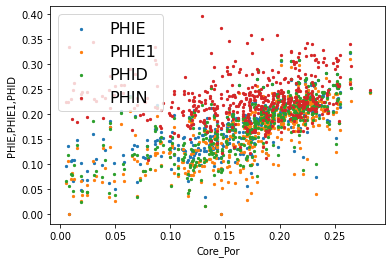

In [392]:
plt.scatter(dataset['Core_Por'], dataset['PHIE'],label='PHIE',s=5)
plt.scatter(dataset['Core_Por'], dataset['PHIE1'],label='PHIE1',s=5)
plt.scatter(dataset['Core_Por'], dataset['PHID'],label='PHID',s=5)
plt.scatter(dataset['Core_Por'], dataset['PHIN'],label='PHIN',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('Core_Por')
plt.ylabel('PHIE,PHIE1,PHID')

Text(0, 0.5, 'PHIE1,PHIE,PHID')

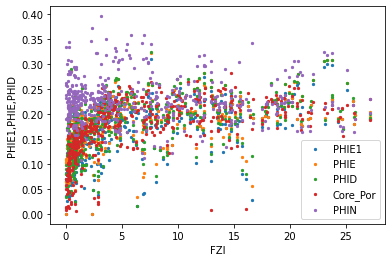

In [393]:
plt.scatter(dataset['FZI'], dataset['PHIE1'],label='PHIE1',s=5)
plt.scatter(dataset['FZI'], dataset['PHIE'],label='PHIE',s=5)
plt.scatter(dataset['FZI'], dataset['PHID'],label='PHID',s=5)
plt.scatter(dataset['FZI'], dataset['Core_Por'],label='Core_Por',s=5)
plt.scatter(dataset['FZI'], dataset['PHIN'],label='PHIN',s=5)
#plt.scatter(dataset['FZI'], dataset['PHIN'],label='PHIN',s=5)
plt.legend(loc='best', fontsize=10)
plt.xlabel('FZI')
plt.ylabel('PHIE1,PHIE,PHID')

In [394]:
#PHIN no correlaciona con las otras Porosidades para valores bajos de porosidad y FZI
print(" Corr FZI con Core_Por        = ",dataset['FZI'].corr(dataset['Core_Por']))
print(" Corr FZI con PHIE            = ",dataset['FZI'].corr(dataset['PHIE']))
print(" Corr FZI con PHIE1           = ",dataset['FZI'].corr(dataset['PHIE1']))
print(" Corr FZI con PHID            = ",dataset['FZI'].corr(dataset['PHID']))
print(" Corr FZI con PHIN            = ",dataset['FZI'].corr(dataset['PHIN']))
#print(" Corr FZI con PromKlogsKtim  = ",dataset['FZI'].corr(dataset['PROM_KLOGS2_KTim']))

 Corr FZI con Core_Por        =  0.5313075994871296
 Corr FZI con PHIE            =  0.4811594861855812
 Corr FZI con PHIE1           =  0.5353633852809517
 Corr FZI con PHID            =  0.5164985887373985
 Corr FZI con PHIN            =  -0.005962629114542838


In [395]:
# Nos quedamos con PHIE1, borramos PHIE, PHID y PHIN . Tambien Core_Por que no esta 
# para entrenar.
dataset.pop("PHIE")
dataset.pop("PHID")
dataset.pop("PHIN")
dataset.pop("Core_Por")

366    0.013
710    0.008
563    0.011
679    0.058
72     0.070
       ...  
585    0.218
256    0.201
579    0.189
307    0.187
455    0.229
Name: Core_Por, Length: 484, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4afadfcf8>]],
      dtype=object)

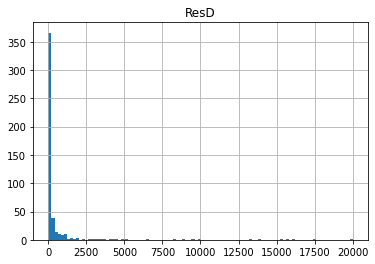

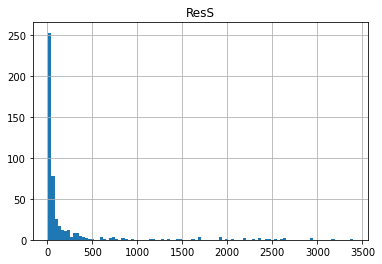

In [396]:
dataset.hist(column='ResD',bins=100)
#dataset.hist(column='ResM',bins=100)
dataset.hist(column='ResS',bins=100)

In [0]:
dataset.insert(5, "ResD-S", dataset['ResD']-dataset['ResS'], True)
dataset.insert(5, "ResPROM", (dataset['ResD']+dataset['ResS'])/2, True)

Text(0, 0.5, 'ResS')

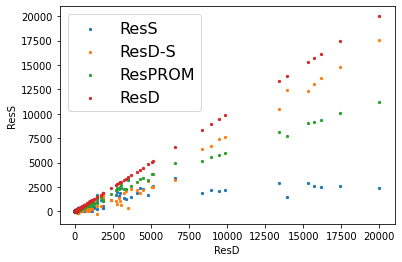

In [398]:
plt.scatter(dataset['ResD'], dataset['ResS'],label='ResS',s=5)
plt.scatter(dataset['ResD'], dataset['ResD-S'],label='ResD-S',s=5)
plt.scatter(dataset['ResD'], dataset['ResPROM'],label='ResPROM',s=5)
plt.scatter(dataset['ResD'], dataset['ResD'],label='ResD',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('ResD')
plt.ylabel('ResS')

In [399]:
print(" Corr ResD con ResS       = ",dataset['ResD'].corr(dataset['ResS']))

 Corr ResD con ResS       =  0.8225841729050803


Text(0, 0.5, 'ResD,ResS')

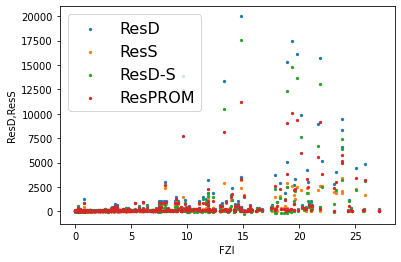

In [400]:
plt.scatter(dataset['FZI'], dataset['ResD'],label='ResD',s=5)
plt.scatter(dataset['FZI'], dataset['ResS'],label='ResS',s=5)
plt.scatter(dataset['FZI'], dataset['ResD-S'],label='ResD-S',s=5)
plt.scatter(dataset['FZI'], dataset['ResPROM'],label='ResPROM',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('ResD,ResS')

In [401]:
print(" Corr FZI con ResD        = ",dataset['FZI'].corr(dataset['ResD']))
print(" Corr FZI con ResS        = ",dataset['FZI'].corr(dataset['ResS']))
print(" Corr FZI con ResD-S      = ",dataset['FZI'].corr(dataset['ResD-S']))
print(" Corr FZI con ResPROM      = ",dataset['FZI'].corr(dataset['ResPROM']))

 Corr FZI con ResD        =  0.3935526393971294
 Corr FZI con ResS        =  0.5136911250875698
 Corr FZI con ResD-S      =  0.3311188530074326
 Corr FZI con ResPROM      =  0.4291349666571265


In [0]:
#dataset['ResD-S']=np.clip(dataset['ResD-S'], a_max=200, a_min=0)

In [0]:
#upper_lim = dataset['ResD'].quantile(.999)
#lower_lim = dataset['ResD'].quantile(.00)
#datasetnew = dataset[(dataset['ResD'] < upper_lim) & (dataset['ResD'] > lower_lim)]
#upper_lim = datasetnew['ResS'].quantile(.999)
#lower_lim = datasetnew['ResS'].quantile(.00)
#datasetnew = datasetnew[(dataset['ResS'] < upper_lim) & (datasetnew['ResS'] > lower_lim)]
#upper_lim = datasetnew['ResM'].quantile(.999)
#lower_lim = datasetnew['ResM'].quantile(.00)
#datasetnew = datasetnew[(datasetnew['ResM'] < upper_lim) & (datasetnew['ResM'] > lower_lim)]
#datasetnew.shape

In [404]:
# Nos quedamos con ResS, Borramos ResD, ResD-S y ResPROM
dataset.pop("ResD")
dataset.pop("ResD-S")
dataset.pop("ResPROM")

366      31.27640
710     102.82845
563      42.61135
679      35.28350
72       45.24535
          ...    
585     154.90105
256     113.88925
579    3254.39260
307     168.60495
455      60.57955
Name: ResPROM, Length: 484, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4af92e6d8>]],
      dtype=object)

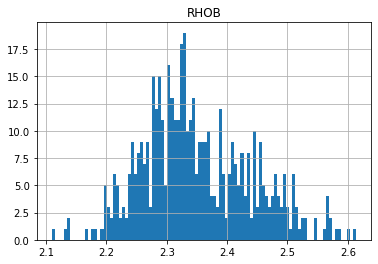

In [405]:
dataset.hist(column='RHOB',bins=100)

Text(0, 0.5, 'RHOB')

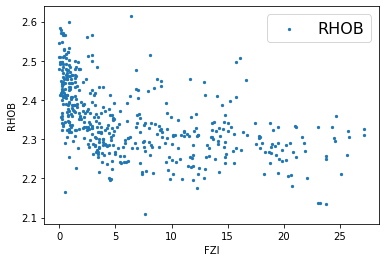

In [406]:
plt.scatter(dataset['FZI'], dataset['RHOB'],label='RHOB',s=5)
#plt.scatter(dataset['FZI'], dataset['PHIE1'],label='PHIE1',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('RHOB')

In [407]:
print(" Corr FZI con RHOB        = ",dataset['FZI'].corr(dataset['RHOB']))
print(" Corr RHOB con PHIE1        = ",dataset['RHOB'].corr(dataset['PHIE1']))

 Corr FZI con RHOB        =  -0.5165160209097386
 Corr RHOB con PHIE1        =  -0.9556222658188334


In [0]:
#la dejamos por ahora aunque podríamos dejar solo PHIE con mayor correlación con FZI 0.53

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4aee59e48>]],
      dtype=object)

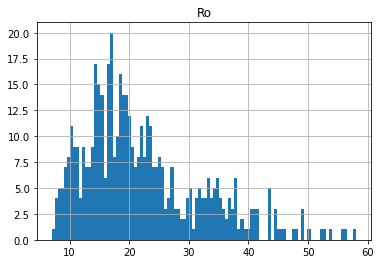

In [409]:
dataset.hist(column='Ro',bins=100)

Text(0, 0.5, 'Ro')

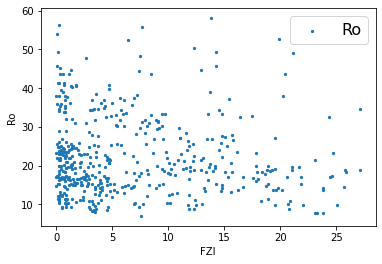

In [410]:
plt.scatter(dataset['FZI'], dataset['Ro'],label='Ro',s=5)
#plt.scatter(dataset['FZI'], dataset['ResS'],label='ResS',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('Ro')

In [411]:
print(" Corr FZI con Ro        = ",dataset['FZI'].corr(dataset['Ro']))

 Corr FZI con Ro        =  -0.07243364434522735


In [412]:
# Muy baja correlación, lo sacamos.
dataset.pop("Ro")

366    17.0348
710    38.0000
563    23.2911
679    14.6504
72     17.4251
        ...   
585    14.3745
256    19.0029
579    18.2983
307    34.7221
455    18.9669
Name: Ro, Length: 484, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b8687828>]],
      dtype=object)

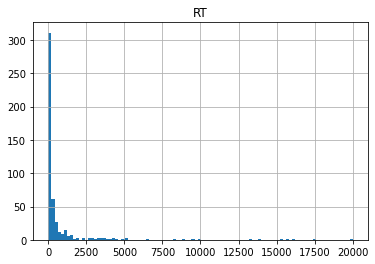

In [413]:
dataset.hist(column='RT',bins=100)

Text(0, 0.5, 'RT')

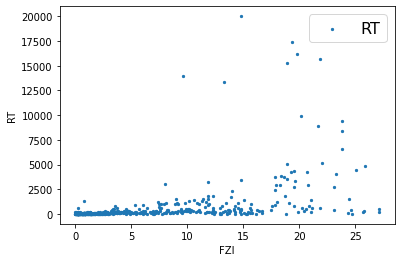

In [414]:
plt.scatter(dataset['FZI'], dataset['RT'],label='RT',s=5)
#plt.scatter(dataset['FZI'], dataset['ResS'],label='ResS',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('RT')

In [415]:
print(" Corr FZI con RT        = ",dataset['FZI'].corr(dataset['RT']))
print(" Corr FZI con ResS        = ",dataset['FZI'].corr(dataset['ResS']))
print(" Corr RT con ResS        = ",dataset['RT'].corr(dataset['ResS']))

 Corr FZI con RT        =  0.4446465830699396
 Corr FZI con ResS        =  0.5136911250875698
 Corr RT con ResS        =  0.8115416114014168


In [0]:
#Lo dejamos, por ahora

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4aeb29550>]],
      dtype=object)

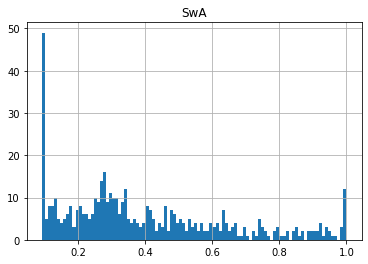

In [417]:
dataset.hist(column='SwA',bins=100)

Text(0, 0.5, 'SwA')

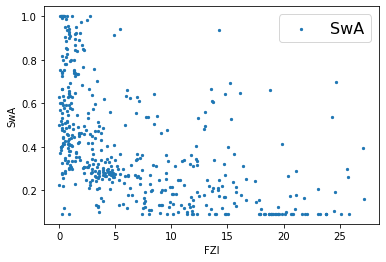

In [418]:
plt.scatter(dataset['FZI'], dataset['SwA'],label='SwA',s=5)
#plt.scatter(dataset['FZI'], dataset['ResS'],label='ResS',s=5)
plt.legend(loc='best', fontsize=16)
plt.xlabel('FZI')
plt.ylabel('SwA')

In [419]:
print(" Corr FZI con SwA         = ",dataset['FZI'].corr(dataset['SwA']))
print(" Corr SwA con ResS        = ",dataset['SwA'].corr(dataset['ResS']))
print(" Corr SwA con RT         = ",dataset['SwA'].corr(dataset['RT']))

 Corr FZI con SwA         =  -0.5376490781458133
 Corr SwA con ResS        =  -0.404580652469362
 Corr SwA con RT         =  -0.34709955444412266


In [0]:
#SwA se queda, muy buena correlación.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4ae298a58>]],
      dtype=object)

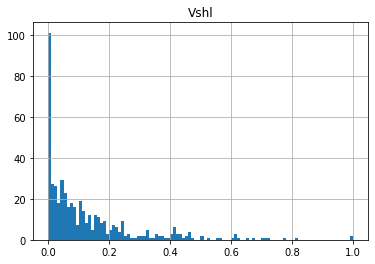

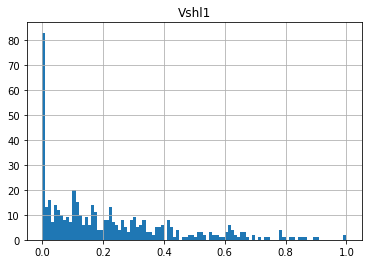

In [421]:
dataset.hist(column='Vshl',bins=100)
dataset.hist(column='Vshl1',bins=100)

Text(0, 0.5, 'Vshl1')

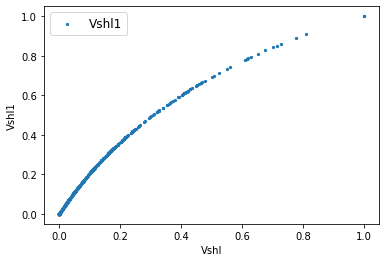

In [422]:
plt.scatter(dataset['Vshl'], dataset['Vshl1'],label='Vshl1',s=5)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Vshl')
plt.ylabel('Vshl1')

Text(0, 0.5, 'Vshl,Vshl1')

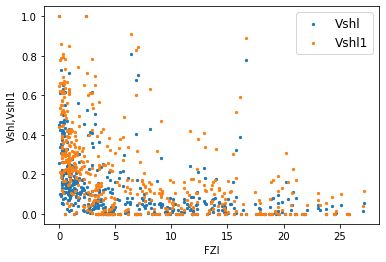

In [423]:
plt.scatter(dataset['FZI'], dataset['Vshl'],label='Vshl',s=5)
plt.scatter(dataset['FZI'], dataset['Vshl1'],label='Vshl1',s=5)
plt.legend(loc='best', fontsize=12)
plt.xlabel('FZI')
plt.ylabel('Vshl,Vshl1')

In [424]:
print(" Corr FZI con Vshl        = ",dataset['FZI'].corr(dataset['Vshl']))
print(" Corr FZI con Vshl1       = ",dataset['FZI'].corr(dataset['Vshl1']))
print(" Corr Vshl con Vshl1      = ",dataset['Vshl'].corr(dataset['Vshl1']))

 Corr FZI con Vshl        =  -0.4048257315590656
 Corr FZI con Vshl1       =  -0.47092965789206825
 Corr Vshl con Vshl1      =  0.9764698503800032


In [425]:
# nos quedamos con Vshl1, borramos Vshl
dataset.pop("Vshl")

366    0.4490
710    1.0000
563    0.2579
679    0.4659
72     0.6097
        ...  
585    0.0000
256    0.0000
579    0.0000
307    0.0161
455    0.0533
Name: Vshl, Length: 484, dtype: float64

## dataset

In [0]:
#sns.pairplot(dataset[["FZI","DEPTH","X","Y","CALI","GR","PEF","PHIE1","PROM_KLOGS2_KTim","ResS","RHOB","RT","SwA","Vshl1"]], diag_kind="kde")

In [427]:
dataset.shape

(484, 14)

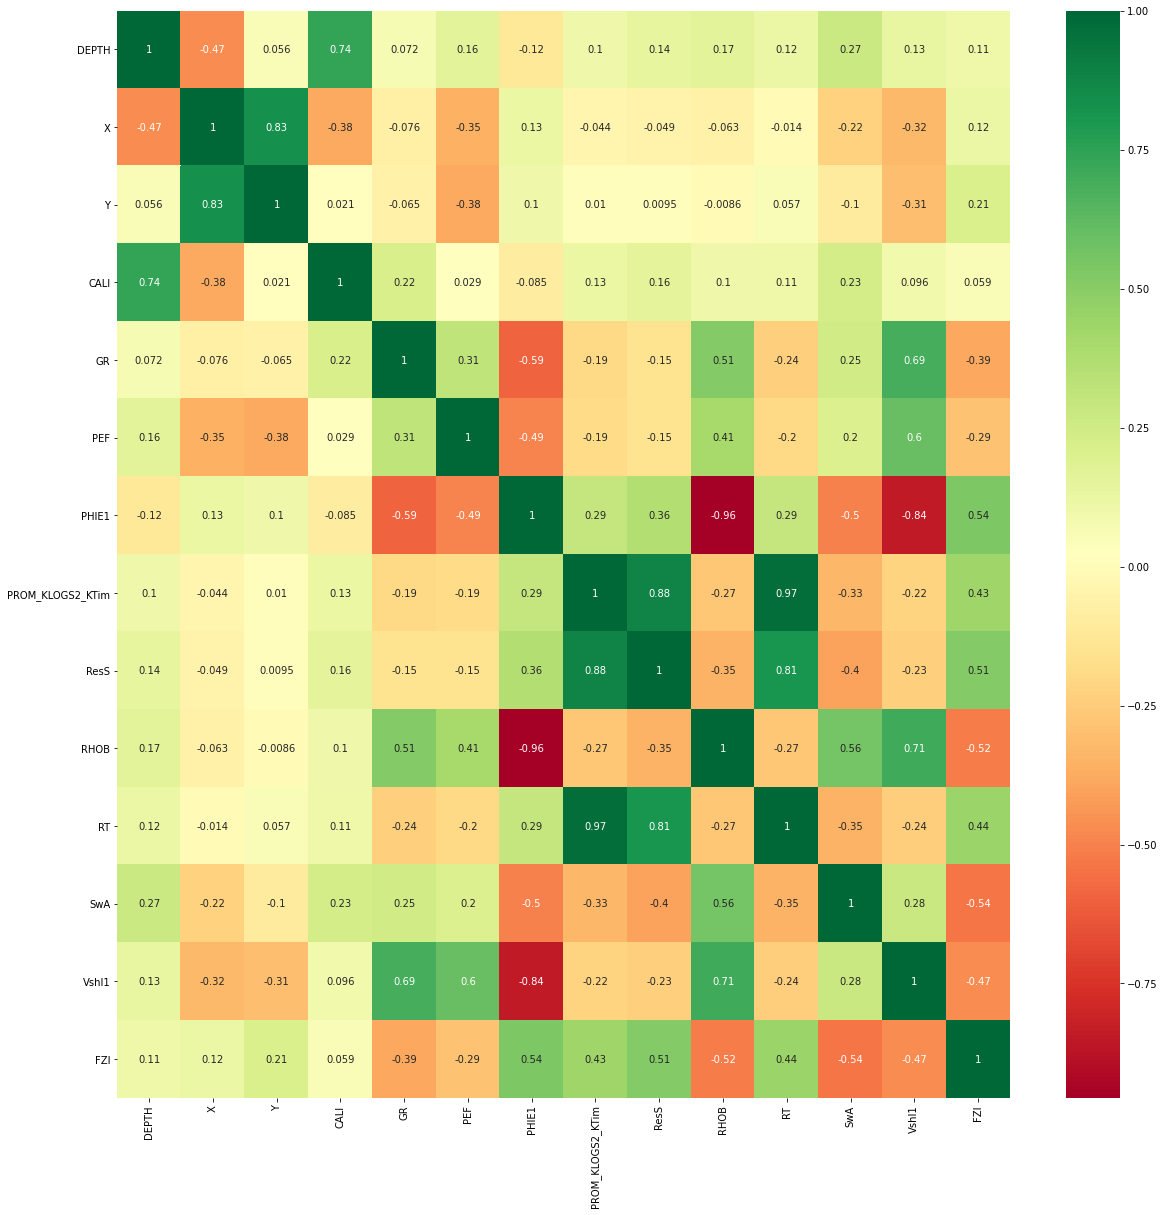

In [428]:
#get the correlations of each feature in the dataset
correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [429]:
#Quitamos DEPTH, X, Y, CALI por ahora
dataset.pop("DEPTH")
dataset.pop("X")
dataset.pop("Y")
dataset.pop("CALI")

366    8.7474
710    8.2132
563    9.2066
679    8.4528
72     9.0654
        ...  
585    8.7322
256    8.4034
579    9.0512
307    9.0731
455    8.7596
Name: CALI, Length: 484, dtype: float64

In [0]:
#sns.pairplot(dataset[["FZI","GR","PEF","PHIE1","PROM_KLOGS2_KTim","ResS","RHOB","RT","SwA","Vshl1"]], diag_kind="kde")

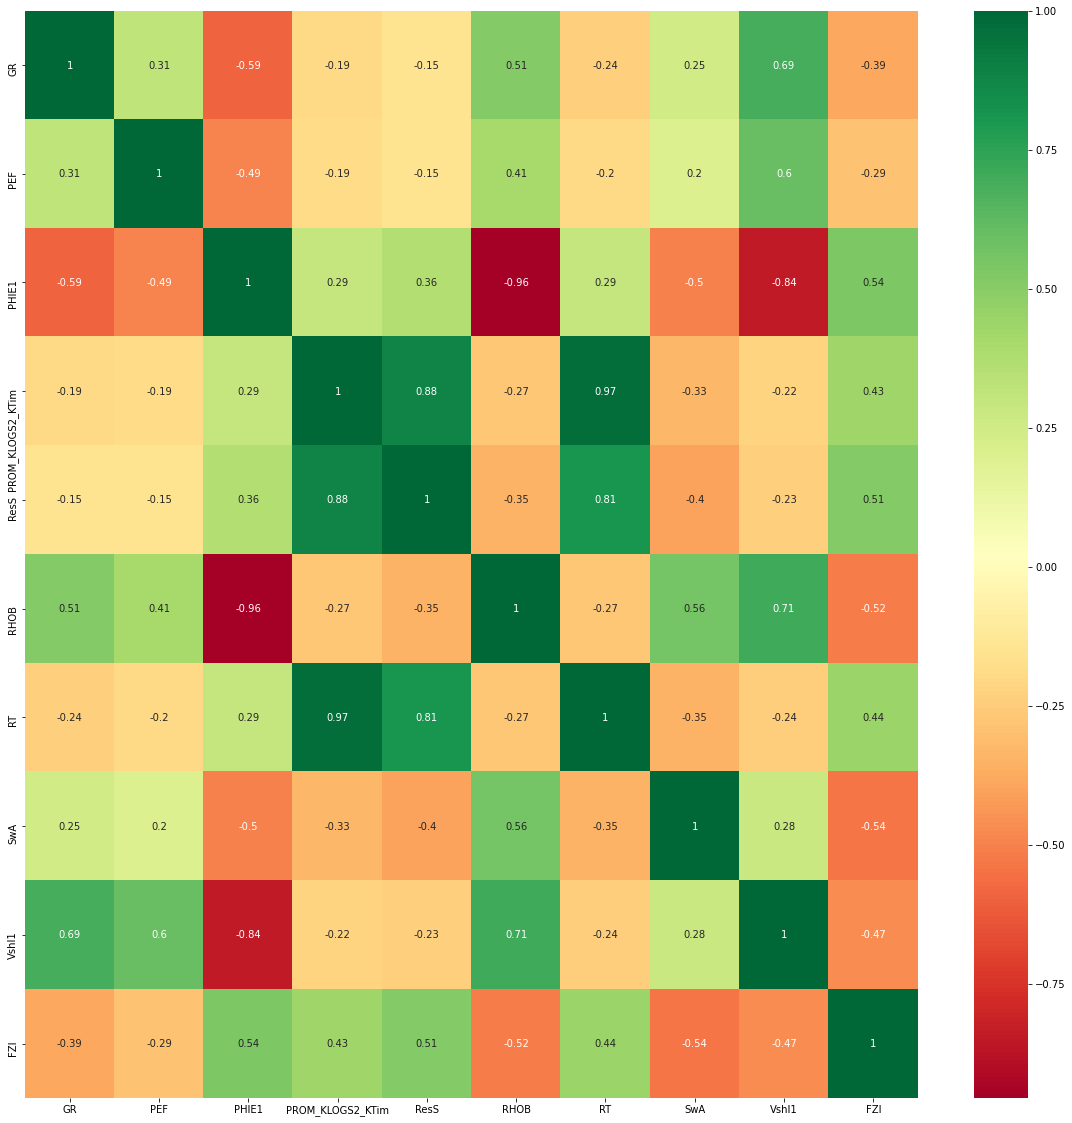

In [431]:
# Deberíamos ver de truncar la distribucion del PEF, PROMKLOGS2_KTim, RWS y RT
# Por ahora lo dejamos, luego probaremos con ese tema
#
correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [432]:
dataset

,GR,PEF,PHIE1,PROM_KLOGS2_KTim,ResS,RHOB,RT,SwA,Vshl1,FZI
366,72.4598,2.1624,0.0698,31.27640,29.5266,2.4795,43.8036,0.5023,0.6472,0.000000
710,69.0570,3.2153,0.0000,102.82845,143.5301,2.5468,168.4416,0.2256,1.0000,0.000000
563,36.1242,2.1464,0.0816,42.61135,38.4887,2.5106,46.7340,0.6313,0.4403,0.000000
679,65.4564,3.1989,0.0652,35.28350,34.6726,2.4926,39.6887,0.5702,0.6627,0.029947
72,71.0095,2.1661,0.0365,45.24535,39.6892,2.5839,50.8015,0.3697,0.7803,0.061068
...,...,...,...,...,...,...,...,...,...,...
585,19.1363,1.9448,0.2253,154.90105,146.7157,2.2597,163.0864,0.2969,0.0000,25.643195
256,16.6252,1.7055,0.1798,113.88925,24.0403,2.3223,279.5403,0.2607,0.0000,25.742988
579,16.8318,1.8159,0.1975,3254.39260,1674.0201,2.3053,4834.7651,0.0920,0.0000,25.830608
307,27.8118,2.0421,0.1892,168.60495,127.5495,2.3254,209.6604,0.3950,0.0380,27.125986


In [433]:
type(dataset)
dataset.dtypes

GR                  float64
PEF                 float64
PHIE1               float64
PROM_KLOGS2_KTim    float64
ResS                float64
RHOB                float64
RT                  float64
SwA                 float64
Vshl1               float64
FZI                 float64
dtype: object

[0.13252085 0.06722364 0.06796198 0.03648886 0.03195737 0.05240055
 0.56103826 0.05040849]


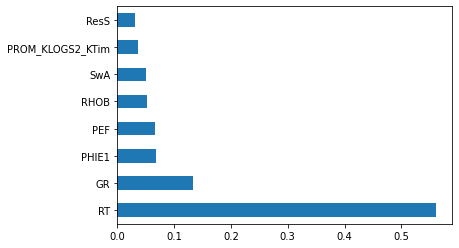

In [434]:
X = dataset.iloc[:,0:8] #independent columns
y = dataset.iloc[:,-1] # pick last column for the target feature
model = DecisionTreeRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [0]:
# Segun este analisis la variable mas importante es el RT y la menos importante es el PROM_KLOGS2_KTim

In [436]:
dataset.shape

(484, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4ade31e48>]],
      dtype=object)

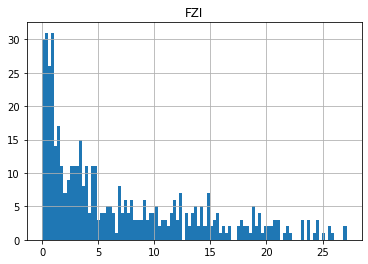

In [437]:
dataset.hist(column='FZI',bins=100)

In [438]:
upper_lim = dataset['FZI'].quantile(.9999)
lower_lim = dataset['FZI'].quantile(.0)
dataset = dataset[(dataset['FZI'] < upper_lim) & (dataset['FZI'] > lower_lim)]
dataset.shape

(480, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4adbd3a58>]],
      dtype=object)

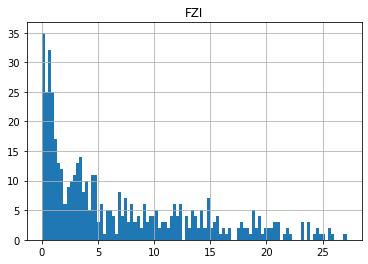

In [439]:
dataset.hist(column='FZI',bins=100)

In [0]:
#Determinamos el set de datos de entrenamiento Train y de objetivo labels
train_dataset = dataset.sample(frac=0.85,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [441]:
train_stats = train_dataset.describe()
train_stats.pop("FZI")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
GR,408.0,40.418285,19.890008,13.7887,26.513775,34.85950,49.797575,132.08290
PEF,408.0,1.962911,0.263935,1.4800,1.814400,1.94685,2.054950,4.19340
PHIE1,408.0,0.165368,0.054991,0.0000,0.125625,0.17455,0.204225,0.31030
PROM_KLOGS2_KTim,408.0,414.622668,1307.064938,21.4975,44.654650,75.13770,173.873525,11214.47205
ResS,408.0,215.699536,518.662208,13.3768,22.904025,43.57955,130.071625,3393.67650
RHOB,408.0,2.346396,0.088540,2.1095,2.286000,2.33075,2.409150,2.61380
RT,408.0,720.816531,2206.035524,24.1325,54.966050,143.67185,337.206700,20000.00000
SwA,408.0,0.394929,0.249444,0.0920,0.206525,0.32930,0.533850,1.00000
Vshl1,408.0,0.209604,0.204969,0.0000,0.045075,0.15790,0.309775,1.00000


In [0]:
#Determinamos el conjunto de entrenamiento y de labels
train_labels = train_dataset.pop('FZI')
test_labels = test_dataset.pop('FZI')

In [0]:
#Normalizamos los datos para evitar problemas de escala
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
#def build_model():
#  model = keras.Sequential([
#    layers.Dense(15, activation='sigmoid', input_shape=[len(train_dataset.keys())]),
#    layers.Dense(15, activation='sigmoid'),
#    layers.Dense(15, activation='relu'),
#    layers.Dense(15, activation='sigmoid'),
#    layers.Dense(1)
#  ])
#
#  optimizer = tf.keras.optimizers.RMSprop(0.00003)
#
#  model.compile(loss='mse',
#                optimizer=optimizer,
#                metrics=['mae', 'mse'])
#  return model

In [0]:
#model = build_model()

In [0]:
#model.summary()

In [0]:
#Testeando que funciona
#example_batch = normed_train_data[:25]
#example_result = model.predict(example_batch)
#example_result

In [0]:
# Entrenamos el modelo
#EPOCHS = 50000
#
#history = model.fit(
#  normed_train_data, train_labels,
#  epochs=EPOCHS, validation_split = 0.15, verbose=0,
#  callbacks=[tfdocs.modeling.EpochDots()])

In [0]:
#hist = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch
#hist.tail()

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [0]:
#plotter.plot({'Basic': history}, metric = "mae")
#plt.ylim([0, 7])
#plt.ylabel('MAE [FZI]')

In [0]:
#plotter.plot({'Basic': history}, metric = "mse")
#plt.ylim([0, 170])
#plt.ylabel('MSE [FZI^2]')

In [473]:
def build_model():
  # nc=4000
    ncm=800
    act='tanh'
    model = keras.Sequential([
    layers.Dense(ncm, activation=act, input_shape=[len(train_dataset.keys())]),
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),  
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),
    layers.Dense(ncm, activation=act),
    layers.Dense(1)
])
    optimizer = tf.keras.optimizers.RMSprop(0.0001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

EPOCHS = 100000

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=4000)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.15, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:74.6659,  mae:6.7779,  mse:74.6659,  val_loss:58.0521,  val_mae:5.7157,  val_mse:58.0521,  
....................................................................................................
Epoch: 100, loss:15.8779,  mae:2.7431,  mse:15.8779,  val_loss:20.6944,  val_mae:3.1142,  val_mse:20.6944,  
....................................................................................................
Epoch: 200, loss:5.7506,  mae:1.5861,  mse:5.7506,  val_loss:25.3284,  val_mae:3.2987,  val_mse:25.3284,  
....................................................................................................
Epoch: 300, loss:3.7360,  mae:1.1872,  mse:3.7360,  val_loss:23.5581,  val_mae:3.1011,  val_mse:23.5581,  
....................................................................................................
Epoch: 400, loss:0.9840,  mae:0.6358,  mse:0.9840,  val_loss:20.9980,  val_mae:2.9853,  val_mse:20.9980,  
..........................................................

Text(0, 0.5, 'MAE [FZI]')

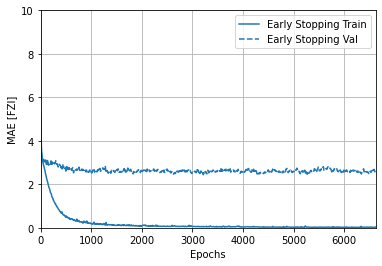

In [474]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [FZI]')

In [475]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Resultado".format(mae))

3/3 - 0s - loss: 15.7853 - mae: 2.7421 - mse: 15.7853
Testing set Mean Abs Error:  2.74 Resultado


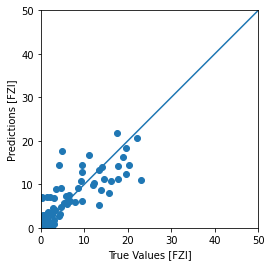

In [476]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [FZI]')
plt.ylabel('Predictions [FZI]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
